In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

## Load Iquitos dataset

In [2]:
iquitos_dataset = pd.read_csv("dengueData/Iquitos/iquitos_training_data.csv")
iquitos_dataset.head()
print("Number of observations: ", len(iquitos_dataset))

Number of observations:  468


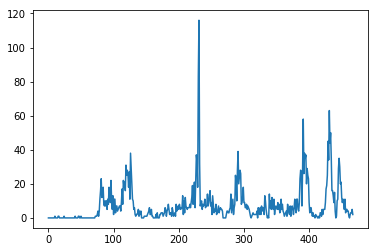

In [3]:
iquitos_dataset["total_cases"].plot()
plt.show()

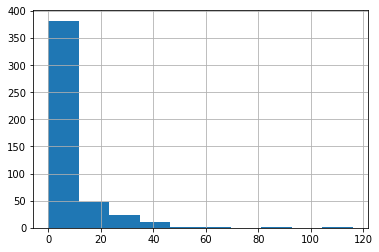

In [4]:
iquitos_dataset["total_cases"].hist()
plt.show()
#Left skewed data

## Baseline Arima 

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
best_model = None
best_aic = None
for (p,d,q) in [(p,d,q) for p in range(3) for d in range(3) for q in range(3)]:
    for (sp, sd, sq) in [(sp, sd, sq) for sp in range(3) for sd in range(3) for sq in range(3)]:
        for seasonality in [1,4,52]:
            try:
                model = SARIMAX(
                    endog = iquitos_dataset["total_cases"],
                    order=(p, d, q),
                    seasonal_order=(sp, sd, sq, seasonality),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
                results = model.fit()
                print("Arima: ", p, d, q, sp, sd, sq, seasonality, "- AIC: ", results.aic)

                if(best_model is None or results.aic < best_aic):
                    best_aic = results.aic
                    best_model = model
            except:
                print("Error: ", p, d, q, seasonality)

E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Arima:  0 0 0 0 0 0 1 - AIC:  3768.260352103388
Arima:  0 0 0 0 0 0 4 - AIC:  3768.260352103388
Arima:  0 0 0 0 0 0 52 - AIC:  3768.260352103388
Arima:  0 0 0 0 0 1 1 - AIC:  3454.40386889332
Arima:  0 0 0 0 0 1 4 - AIC:  3565.9410624409174
Arima:  0 0 0 0 0 1 52 - AIC:  3371.7030641055567
Arima:  0 0 0 0 0 2 1 - AIC:  3346.2887746830356
Arima:  0 0 0 0 0 2 4 - AIC:  3491.7898463903675
Arima:  0 0 0 0 0 2 52 - AIC:  2941.9495255893685
Arima:  0 0 0 0 1 0 1 - AIC:  3261.9586767439214
Arima:  0 0 0 0 1 0 4 - AIC:  3566.773813583686
Arima:  0 0 0 0 1 0 52 - AIC:  3456.7346158565524
Arima:  0 0 0 0 1 1 1 - AIC:  3226.4060473521663
Arima:  0 0 0 0 1 1 4 - AIC:  3495.831015544337
Arima:  0 0 0 0 1 1 52 - AIC:  2873.8907329894064
Arima:  0 0 0 0 1 2 1 - AIC:  3199.021141273839
Arima:  0 0 0 0 1 2 4 - AIC:  3408.675177230982
Arima:  0 0 0 0 1 2 52 - AIC:  11550.770718258867
Arima:  0 0 0 0 2 0 1 - AIC:  3655.005439608117
Arima:  0 0 0 0 2 0 4 - AIC:  3949.8197661796066
Arima:  0 0 0 0 2 0 52 -

E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 0 0 0 2 2 4 - AIC:  3461.973082155531


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 0 0 0 2 2 52 - AIC:  10350.595199808751
Arima:  0 0 0 1 0 0 1 - AIC:  3228.152591294151
Arima:  0 0 0 1 0 0 4 - AIC:  3488.008272375142
Arima:  0 0 0 1 0 0 52 - AIC:  3352.0794292671894
Arima:  0 0 0 1 0 1 1 - AIC:  3213.7713487855635
Arima:  0 0 0 1 0 1 4 - AIC:  3481.0448179112236
Arima:  0 0 0 1 0 1 52 - AIC:  3266.0430128194257
Arima:  0 0 0 1 0 2 1 - AIC:  3193.824796229184
Arima:  0 0 0 1 0 2 4 - AIC:  3432.6385941820317
Arima:  0 0 0 1 0 2 52 - AIC:  2878.5948811251546
Arima:  0 0 0 1 1 0 1 - AIC:  3248.68229891297
Arima:  0 0 0 1 1 0 4 - AIC:  3525.533970704386
Arima:  0 0 0 1 1 0 52 - AIC:  2900.3670541201736
Arima:  0 0 0 1 1 1 1 - AIC:  3201.170117379729
Arima:  0 0 0 1 1 1 4 - AIC:  3424.813311404948
Arima:  0 0 0 1 1 1 52 - AIC:  2863.2572802208115
Arima:  0 0 0 1 1 2 1 - AIC:  3200.9824376569813
Arima:  0 0 0 1 1 2 4 - AIC:  3397.2666723686193


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 0 0 1 1 2 52 - AIC:  10343.190977094404
Arima:  0 0 0 1 2 0 1 - AIC:  3539.7122935376037
Arima:  0 0 0 1 2 0 4 - AIC:  3782.6941481363947
Arima:  0 0 0 1 2 0 52 - AIC:  2721.4452266882136
Arima:  0 0 0 1 2 1 1 - AIC:  3244.20086829528
Arima:  0 0 0 1 2 1 4 - AIC:  3512.284935355292
Arima:  0 0 0 1 2 1 52 - AIC:  2607.063305728332
Arima:  0 0 0 1 2 2 1 - AIC:  3202.0131041048244
Arima:  0 0 0 1 2 2 4 - AIC:  3404.522576703633
Arima:  0 0 0 1 2 2 52 - AIC:  15875.366472702332
Arima:  0 0 0 2 0 0 1 - AIC:  3219.30702980961
Arima:  0 0 0 2 0 0 4 - AIC:  3462.309168861852
Arima:  0 0 0 2 0 0 52 - AIC:  2892.2550820417596
Arima:  0 0 0 2 0 1 1 - AIC:  3208.20284655044
Arima:  0 0 0 2 0 1 4 - AIC:  3430.06274727246
Arima:  0 0 0 2 0 1 52 - AIC:  2871.216104945801
Arima:  0 0 0 2 0 2 1 - AIC:  3195.143825734678
Arima:  0 0 0 2 0 2 4 - AIC:  3422.697983724859
Arima:  0 0 0 2 0 2 52 - AIC:  2861.3075657767486
Arima:  0 0 0 2 1 0 1 - AIC:  3204.8758550639313
Arima:  0 0 0 2 1 0 4 - AIC:

E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 0 0 2 2 2 52 - AIC:  16960.85894365234
Arima:  0 0 1 0 0 0 1 - AIC:  3454.40386889332
Arima:  0 0 1 0 0 0 4 - AIC:  3454.40386889332
Arima:  0 0 1 0 0 0 52 - AIC:  3454.40386889332
Arima:  0 0 1 0 0 1 1 - AIC:  3389.4254412419305
Arima:  0 0 1 0 0 1 4 - AIC:  3315.524668469462
Arima:  0 0 1 0 0 1 52 - AIC:  3101.9506076056177
Arima:  0 0 1 0 0 2 1 - AIC:  3315.745556567571
Arima:  0 0 1 0 0 2 4 - AIC:  3270.5426174706954
Arima:  0 0 1 0 0 2 52 - AIC:  2714.9507955452536
Arima:  0 0 1 0 1 0 1 - AIC:  3226.4060473521663
Arima:  0 0 1 0 1 0 4 - AIC:  3401.3344587367123
Arima:  0 0 1 0 1 0 52 - AIC:  3223.5138534533758
Arima:  0 0 1 0 1 1 1 - AIC:  3228.105698984974
Arima:  0 0 1 0 1 1 4 - AIC:  3279.2549376327565
Arima:  0 0 1 0 1 1 52 - AIC:  2675.16503098559
Arima:  0 0 1 0 1 2 1 - AIC:  3195.0919299339184
Arima:  0 0 1 0 1 2 4 - AIC:  3201.2581672301994


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 0 1 0 1 2 52 - AIC:  11029.483077454439
Arima:  0 0 1 0 2 0 1 - AIC:  3257.010711379402
Arima:  0 0 1 0 2 0 4 - AIC:  3753.4899890869156
Arima:  0 0 1 0 2 0 52 - AIC:  3248.698600262325
Arima:  0 0 1 0 2 1 1 - AIC:  3284.1851251663707
Arima:  0 0 1 0 2 1 4 - AIC:  3367.9987988493917
Arima:  0 0 1 0 2 1 52 - AIC:  2534.7261319197464
Arima:  0 0 1 0 2 2 1 - AIC:  3195.1777972337486
Arima:  0 0 1 0 2 2 4 - AIC:  3257.189801129258


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 0 1 0 2 2 52 - AIC:  10425.39851390765
Arima:  0 0 1 1 0 0 1 - AIC:  3213.771348793541
Arima:  0 0 1 1 0 0 4 - AIC:  3292.265642331709
Arima:  0 0 1 1 0 0 52 - AIC:  3100.226803949951
Arima:  0 0 1 1 0 1 1 - AIC:  3193.824796187794
Arima:  0 0 1 1 0 1 4 - AIC:  3279.734099387649
Arima:  0 0 1 1 0 1 52 - AIC:  3043.942080585165
Arima:  0 0 1 1 0 2 1 - AIC:  3188.3862224071663
Arima:  0 0 1 1 0 2 4 - AIC:  3226.8880366490143
Arima:  0 0 1 1 0 2 52 - AIC:  2689.9001042677955
Arima:  0 0 1 1 1 0 1 - AIC:  3201.170117217813
Arima:  0 0 1 1 1 0 4 - AIC:  3352.7797896812936
Arima:  0 0 1 1 1 0 52 - AIC:  2718.6090767528044
Arima:  0 0 1 1 1 1 1 - AIC:  3200.9824372699823
Arima:  0 0 1 1 1 1 4 - AIC:  3225.904298128073
Arima:  0 0 1 1 1 1 52 - AIC:  2677.1545566114128
Arima:  0 0 1 1 1 2 1 - AIC:  3197.089396842807
Arima:  0 0 1 1 1 2 4 - AIC:  3200.393628837299


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 0 1 1 1 2 52 - AIC:  11207.15564886956
Arima:  0 0 1 1 2 0 1 - AIC:  3244.2008693798252
Arima:  0 0 1 1 2 0 4 - AIC:  3631.217681254547
Arima:  0 0 1 1 2 0 52 - AIC:  2566.6696454176245
Arima:  0 0 1 1 2 1 1 - AIC:  3202.1624727484123
Arima:  0 0 1 1 2 1 4 - AIC:  3334.508941155036
Arima:  0 0 1 1 2 1 52 - AIC:  2448.6443354055946
Arima:  0 0 1 1 2 2 1 - AIC:  3197.043449607515
Arima:  0 0 1 1 2 2 4 - AIC:  3208.969352688974
Arima:  0 0 1 1 2 2 52 - AIC:  17197.41710969206
Arima:  0 0 1 2 0 0 1 - AIC:  3207.8638430463557
Arima:  0 0 1 2 0 0 4 - AIC:  3268.5777113389854
Arima:  0 0 1 2 0 0 52 - AIC:  2698.5448065106825
Arima:  0 0 1 2 0 1 1 - AIC:  3195.1438257896743
Arima:  0 0 1 2 0 1 4 - AIC:  3239.0061272273147
Arima:  0 0 1 2 0 1 52 - AIC:  2691.5539939710425
Arima:  0 0 1 2 0 2 1 - AIC:  3190.5050990284094
Arima:  0 0 1 2 0 2 4 - AIC:  3226.2265332901843
Arima:  0 0 1 2 0 2 52 - AIC:  2675.7423683172447
Arima:  0 0 1 2 1 0 1 - AIC:  3204.4692314069184
Arima:  0 0 1 2 1 0

E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 0 1 2 2 2 52 - AIC:  17096.990581549857
Arima:  0 0 2 0 0 0 1 - AIC:  3346.2887746830356
Arima:  0 0 2 0 0 0 4 - AIC:  3346.2887746830356
Arima:  0 0 2 0 0 0 52 - AIC:  3346.2887746830356
Arima:  0 0 2 0 0 1 1 - AIC:  3315.7455569332637
Arima:  0 0 2 0 0 1 4 - AIC:  3279.4086892287014
Arima:  0 0 2 0 0 1 52 - AIC:  3012.1689843668446
Arima:  0 0 2 0 0 2 1 - AIC:  3310.6732264268694
Arima:  0 0 2 0 0 2 4 - AIC:  3241.0845012681866
Arima:  0 0 2 0 0 2 52 - AIC:  2641.809830135923
Arima:  0 0 2 0 1 0 1 - AIC:  3199.021141273839
Arima:  0 0 2 0 1 0 4 - AIC:  3394.5231426226455
Arima:  0 0 2 0 1 0 52 - AIC:  3165.3540552802515
Arima:  0 0 2 0 1 1 1 - AIC:  3195.091929984611
Arima:  0 0 2 0 1 1 4 - AIC:  3220.040343044124
Arima:  0 0 2 0 1 1 52 - AIC:  2620.2233813156486
Arima:  0 0 2 0 1 2 1 - AIC:  3191.0943593438433
Arima:  0 0 2 0 1 2 4 - AIC:  3173.984878984852


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 0 2 0 1 2 52 - AIC:  11020.704519675008
Arima:  0 0 2 0 2 0 1 - AIC:  3221.974332892205
Arima:  0 0 2 0 2 0 4 - AIC:  3730.0608167565124
Arima:  0 0 2 0 2 0 52 - AIC:  3195.05894372488
Arima:  0 0 2 0 2 1 1 - AIC:  3195.1777975535106
Arima:  0 0 2 0 2 1 4 - AIC:  3360.774146940661
Arima:  0 0 2 0 2 1 52 - AIC:  2490.279772179638
Arima:  0 0 2 0 2 2 1 - AIC:  3191.1826162919097
Arima:  0 0 2 0 2 2 4 - AIC:  3201.743707937201
Arima:  0 0 2 0 2 2 52 - AIC:  8836.580961614089
Arima:  0 0 2 1 0 0 1 - AIC:  3193.824796444528
Arima:  0 0 2 1 0 0 4 - AIC:  3274.689733754896
Arima:  0 0 2 1 0 0 52 - AIC:  3023.35079942367
Arima:  0 0 2 1 0 1 1 - AIC:  3188.5277100538374
Arima:  0 0 2 1 0 1 4 - AIC:  3248.854765295599
Arima:  0 0 2 1 0 1 52 - AIC:  2982.8964256391337
Arima:  0 0 2 1 0 2 1 - AIC:  3184.524843980339
Arima:  0 0 2 1 0 2 4 - AIC:  3199.098862765689
Arima:  0 0 2 1 0 2 52 - AIC:  2637.867066701739
Arima:  0 0 2 1 1 0 1 - AIC:  3200.98243672701
Arima:  0 0 2 1 1 0 4 - AIC:  

E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 0 2 1 1 2 52 - AIC:  11205.47351315755
Arima:  0 0 2 1 2 0 1 - AIC:  3202.012247817844
Arima:  0 0 2 1 2 0 4 - AIC:  3623.1031132935304
Arima:  0 0 2 1 2 0 52 - AIC:  2543.4316137111327
Arima:  0 0 2 1 2 1 1 - AIC:  3197.043449854707
Arima:  0 0 2 1 2 1 4 - AIC:  3311.724868864198
Arima:  0 0 2 1 2 1 52 - AIC:  2412.2533684256096


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 0 2 1 2 2 1 - AIC:  3192.7559059301284
Arima:  0 0 2 1 2 2 4 - AIC:  3180.7746206880392


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 0 2 1 2 2 52 - AIC:  17113.295198116502
Arima:  0 0 2 2 0 0 1 - AIC:  3195.143825678651
Arima:  0 0 2 2 0 0 4 - AIC:  3247.2644532461636
Arima:  0 0 2 2 0 0 52 - AIC:  2645.0030380594244


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 0 2 2 0 1 1 - AIC:  3191.9672740238793
Arima:  0 0 2 2 0 1 4 - AIC:  3216.8598135705392
Arima:  0 0 2 2 0 1 52 - AIC:  2645.2209002208438
Arima:  0 0 2 2 0 2 1 - AIC:  3186.7343549741418


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 0 2 2 0 2 4 - AIC:  3200.1334905702433
Arima:  0 0 2 2 0 2 52 - AIC:  2625.521157279246
Arima:  0 0 2 2 1 0 1 - AIC:  3199.665884355555
Arima:  0 0 2 2 1 0 4 - AIC:  3284.067450798068
Arima:  0 0 2 2 1 0 52 - AIC:  2283.6432917019424
Arima:  0 0 2 2 1 1 1 - AIC:  3190.5540413868985
Arima:  0 0 2 2 1 1 4 - AIC:  3192.925572518781
Arima:  0 0 2 2 1 1 52 - AIC:  2267.241228821441
Arima:  0 0 2 2 1 2 1 - AIC:  3186.4275899877084
Arima:  0 0 2 2 1 2 4 - AIC:  3176.309426031956


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 0 2 2 1 2 52 - AIC:  11130.031572720949
Arima:  0 0 2 2 2 0 1 - AIC:  3200.407593072622
Arima:  0 0 2 2 2 0 4 - AIC:  3512.703460621968
Arima:  0 0 2 2 2 0 52 - AIC:  2070.482418293993
Arima:  0 0 2 2 2 1 1 - AIC:  3195.9116176465745
Arima:  0 0 2 2 2 1 4 - AIC:  3280.0850467646505
Arima:  0 0 2 2 2 1 52 - AIC:  2025.2809448022026


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 0 2 2 2 2 1 - AIC:  3187.226177933717


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 0 2 2 2 2 4 - AIC:  3182.7763533392927
Arima:  0 0 2 2 2 2 52 - AIC:  17644.636152918392
Arima:  0 1 0 0 0 0 1 - AIC:  3261.9586767439214
Arima:  0 1 0 0 0 0 4 - AIC:  3261.9586767439214
Arima:  0 1 0 0 0 0 52 - AIC:  3261.9586767439214
Arima:  0 1 0 0 0 1 1 - AIC:  3226.4060473521663
Arima:  0 1 0 0 0 1 4 - AIC:  3231.126554829695
Arima:  0 1 0 0 0 1 52 - AIC:  2945.903281930479
Arima:  0 1 0 0 0 2 1 - AIC:  3199.021141273839
Arima:  0 1 0 0 0 2 4 - AIC:  3209.162897966833
Arima:  0 1 0 0 0 2 52 - AIC:  2603.201846601808
Arima:  0 1 0 0 1 0 1 - AIC:  3655.005439608117
Arima:  0 1 0 0 1 0 4 - AIC:  3490.86195903477
Arima:  0 1 0 0 1 0 52 - AIC:  3163.9303679215336
Arima:  0 1 0 0 1 1 1 - AIC:  3257.010711379402
Arima:  0 1 0 0 1 1 4 - AIC:  3219.7675996751273
Arima:  0 1 0 0 1 1 52 - AIC:  2617.395241548354
Arima:  0 1 0 0 1 2 1 - AIC:  3221.974332892205
Arima:  0 1 0 0 1 2 4 - AIC:  3191.578048129102
Arima:  0 1 0 0 1 2 52 - AIC:  12210.896100939392
Arima:  0 1 0 0 2 0 1 - A

E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 0 0 2 2 52 - AIC:  9555.726961293867
Arima:  0 1 0 1 0 0 1 - AIC:  3248.68229891297
Arima:  0 1 0 1 0 0 4 - AIC:  3237.393477409751
Arima:  0 1 0 1 0 0 52 - AIC:  2950.7006639458023
Arima:  0 1 0 1 0 1 1 - AIC:  3201.170117379729
Arima:  0 1 0 1 0 1 4 - AIC:  3233.1246255357537
Arima:  0 1 0 1 0 1 52 - AIC:  2945.0853724419053
Arima:  0 1 0 1 0 2 1 - AIC:  3200.9824376569813
Arima:  0 1 0 1 0 2 4 - AIC:  3211.080656381273
Arima:  0 1 0 1 0 2 52 - AIC:  2604.8180746930666
Arima:  0 1 0 1 1 0 1 - AIC:  3539.7122935376037
Arima:  0 1 0 1 1 0 4 - AIC:  3387.316456635404
Arima:  0 1 0 1 1 0 52 - AIC:  2685.901055320036
Arima:  0 1 0 1 1 1 1 - AIC:  3244.20086829528
Arima:  0 1 0 1 1 1 4 - AIC:  3218.8279835168296
Arima:  0 1 0 1 1 1 52 - AIC:  2619.3891750063294
Arima:  0 1 0 1 1 2 1 - AIC:  3202.0131041048244
Arima:  0 1 0 1 1 2 4 - AIC:  3193.12590605244
Arima:  0 1 0 1 1 2 52 - AIC:  12230.412449101084
Arima:  0 1 0 1 2 0 1 - AIC:  3934.4567359733874
Arima:  0 1 0 1 2 0 4 - A

E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 0 1 2 2 52 - AIC:  9015.583805401953
Arima:  0 1 0 2 0 0 1 - AIC:  3204.8758550639313
Arima:  0 1 0 2 0 0 4 - AIC:  3214.921000035663
Arima:  0 1 0 2 0 0 52 - AIC:  2606.508131067947
Arima:  0 1 0 2 0 1 1 - AIC:  3204.4692313767296
Arima:  0 1 0 2 0 1 4 - AIC:  3216.895670379816
Arima:  0 1 0 2 0 1 52 - AIC:  2608.506948742076
Arima:  0 1 0 2 0 2 1 - AIC:  3199.665883971311
Arima:  0 1 0 2 0 2 4 - AIC:  3212.469335104617


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 0 2 0 2 52 - AIC:  2604.4717172089563
Arima:  0 1 0 2 1 0 1 - AIC:  3416.769341719172
Arima:  0 1 0 2 1 0 4 - AIC:  3321.121851046093
Arima:  0 1 0 2 1 0 52 - AIC:  2298.817514511772
Arima:  0 1 0 2 1 1 1 - AIC:  3207.1352837263057
Arima:  0 1 0 2 1 1 4 - AIC:  3200.7578235266196
Arima:  0 1 0 2 1 1 52 - AIC:  2274.3854707196097
Arima:  0 1 0 2 1 2 1 - AIC:  3200.4075937167336
Arima:  0 1 0 2 1 2 4 - AIC:  3195.1248259900894


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 0 2 1 2 52 - AIC:  8785.784805400806
Arima:  0 1 0 2 2 0 1 - AIC:  3770.9354629404816
Arima:  0 1 0 2 2 0 4 - AIC:  3575.2882793143744
Arima:  0 1 0 2 2 0 52 - AIC:  2092.7294172907655
Arima:  0 1 0 2 2 1 1 - AIC:  3418.5558685430915
Arima:  0 1 0 2 2 1 4 - AIC:  3316.876650741495
Arima:  0 1 0 2 2 1 52 - AIC:  2044.963422094835
Arima:  0 1 0 2 2 2 1 - AIC:  3209.564907315228
Arima:  0 1 0 2 2 2 4 - AIC:  3204.9922555510075
Arima:  0 1 0 2 2 2 52 - AIC:  10626.7690767852
Arima:  0 1 1 0 0 0 1 - AIC:  3226.4060473521663
Arima:  0 1 1 0 0 0 4 - AIC:  3226.4060473521663
Arima:  0 1 1 0 0 0 52 - AIC:  3226.4060473521663
Arima:  0 1 1 0 0 1 1 - AIC:  3228.105698984974
Arima:  0 1 1 0 0 1 4 - AIC:  3199.6117105877192
Arima:  0 1 1 0 0 1 52 - AIC:  2914.548569488953
Arima:  0 1 1 0 0 2 1 - AIC:  3195.0919299339184
Arima:  0 1 1 0 0 2 4 - AIC:  3177.7730997455874
Arima:  0 1 1 0 0 2 52 - AIC:  2577.4868845870033
Arima:  0 1 1 0 1 0 1 - AIC:  3257.010711379402
Arima:  0 1 1 0 1 0 4 

E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 1 0 2 2 52 - AIC:  8732.825753769044
Arima:  0 1 1 1 0 0 1 - AIC:  3201.170117217813
Arima:  0 1 1 1 0 0 4 - AIC:  3211.789195461947
Arima:  0 1 1 1 0 0 52 - AIC:  2925.6898790437185
Arima:  0 1 1 1 0 1 1 - AIC:  3200.9824372699823
Arima:  0 1 1 1 0 1 4 - AIC:  3201.5976096821005
Arima:  0 1 1 1 0 1 52 - AIC:  2914.27702406718
Arima:  0 1 1 1 0 2 1 - AIC:  3197.089396842807
Arima:  0 1 1 1 0 2 4 - AIC:  3179.682861113722
Arima:  0 1 1 1 0 2 52 - AIC:  2579.0875265477985
Arima:  0 1 1 1 1 0 1 - AIC:  3244.2008693798252
Arima:  0 1 1 1 1 0 4 - AIC:  3365.914687720071
Arima:  0 1 1 1 1 0 52 - AIC:  2664.1944387714702
Arima:  0 1 1 1 1 1 1 - AIC:  3202.1624727484123
Arima:  0 1 1 1 1 1 4 - AIC:  3187.103752168044
Arima:  0 1 1 1 1 1 52 - AIC:  2592.809282968779
Arima:  0 1 1 1 1 2 1 - AIC:  3197.043449607515
Arima:  0 1 1 1 1 2 4 - AIC:  3162.4271575742096


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 1 1 1 2 52 - AIC:  11601.139728029564
Arima:  0 1 1 1 2 0 1 - AIC:  3533.9481979485718
Arima:  0 1 1 1 2 0 4 - AIC:  3681.8705108414424
Arima:  0 1 1 1 2 0 52 - AIC:  2547.7304792089917
Arima:  0 1 1 1 2 1 1 - AIC:  3247.8738078572455
Arima:  0 1 1 1 2 1 4 - AIC:  3347.4549019462825
Arima:  0 1 1 1 2 1 52 - AIC:  2411.3461250724313
Arima:  0 1 1 1 2 2 1 - AIC:  3212.4462222915236
Arima:  0 1 1 1 2 2 4 - AIC:  3174.182520472481


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 1 1 2 2 52 - AIC:  8964.772517527234
Arima:  0 1 1 2 0 0 1 - AIC:  3204.4692314069184
Arima:  0 1 1 2 0 0 4 - AIC:  3189.536362336312
Arima:  0 1 1 2 0 0 52 - AIC:  2586.63425678452
Arima:  0 1 1 2 0 1 1 - AIC:  3200.4398422312565
Arima:  0 1 1 2 0 1 4 - AIC:  3191.5146035087237
Arima:  0 1 1 2 0 1 52 - AIC:  2588.627103315778
Arima:  0 1 1 2 0 2 1 - AIC:  3190.554041396833
Arima:  0 1 1 2 0 2 4 - AIC:  3181.1998007502552
Arima:  0 1 1 2 0 2 52 - AIC:  2578.1879282854757
Arima:  0 1 1 2 1 0 1 - AIC:  3207.1352831664794
Arima:  0 1 1 2 1 0 4 - AIC:  3298.2710719259594
Arima:  0 1 1 2 1 0 52 - AIC:  2285.422772233811
Arima:  0 1 1 2 1 1 1 - AIC:  3200.407592114637
Arima:  0 1 1 2 1 1 4 - AIC:  3175.8539850254338
Arima:  0 1 1 2 1 1 52 - AIC:  2258.5545703914863
Arima:  0 1 1 2 1 2 1 - AIC:  3198.664972032743
Arima:  0 1 1 2 1 2 4 - AIC:  3164.426097028654


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 1 2 1 2 52 - AIC:  11612.871254640753
Arima:  0 1 1 2 2 0 1 - AIC:  3418.5558684886064
Arima:  0 1 1 2 2 0 4 - AIC:  3554.5801700316724
Arima:  0 1 1 2 2 0 52 - AIC:  2081.758158880004
Arima:  0 1 1 2 2 1 1 - AIC:  3211.4691657251146
Arima:  0 1 1 2 2 1 4 - AIC:  3294.2581412485706
Arima:  0 1 1 2 2 1 52 - AIC:  2034.105465370396
Arima:  0 1 1 2 2 2 1 - AIC:  3204.4593635106235


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 1 2 2 2 4 - AIC:  3175.0997521512136


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 1 2 2 2 52 - AIC:  9018.698957857241
Arima:  0 1 2 0 0 0 1 - AIC:  3199.021141273839
Arima:  0 1 2 0 0 0 4 - AIC:  3199.021141273839
Arima:  0 1 2 0 0 0 52 - AIC:  3199.021141273839
Arima:  0 1 2 0 0 1 1 - AIC:  3195.091929984611
Arima:  0 1 2 0 0 1 4 - AIC:  3172.0029679551617
Arima:  0 1 2 0 0 1 52 - AIC:  2890.2786162670964
Arima:  0 1 2 0 0 2 1 - AIC:  3191.0943593438433
Arima:  0 1 2 0 0 2 4 - AIC:  3149.0909707431238
Arima:  0 1 2 0 0 2 52 - AIC:  2552.6429868226223
Arima:  0 1 2 0 1 0 1 - AIC:  3221.974332892205
Arima:  0 1 2 0 1 0 4 - AIC:  3395.1598020282754
Arima:  0 1 2 0 1 0 52 - AIC:  3107.226227428155
Arima:  0 1 2 0 1 1 1 - AIC:  3195.1777975535106
Arima:  0 1 2 0 1 1 4 - AIC:  3161.1092576925785
Arima:  0 1 2 0 1 1 52 - AIC:  2571.8998204216505
Arima:  0 1 2 0 1 2 1 - AIC:  3191.1826162919097
Arima:  0 1 2 0 1 2 4 - AIC:  3135.6964598724862


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 2 0 1 2 52 - AIC:  12019.79942436349
Arima:  0 1 2 0 2 0 1 - AIC:  3257.4869881762324
Arima:  0 1 2 0 2 0 4 - AIC:  3745.1820397562597
Arima:  0 1 2 0 2 0 52 - AIC:  3141.571773651896
Arima:  0 1 2 0 2 1 1 - AIC:  3225.6528108856537
Arima:  0 1 2 0 2 1 4 - AIC:  3367.2044416695594
Arima:  0 1 2 0 2 1 52 - AIC:  2455.759283464261
Arima:  0 1 2 0 2 2 1 - AIC:  3227.0348943049366
Arima:  0 1 2 0 2 2 4 - AIC:  3145.734331423069


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 2 0 2 2 52 - AIC:  10250.225715806184
Arima:  0 1 2 1 0 0 1 - AIC:  3200.98243672701
Arima:  0 1 2 1 0 0 4 - AIC:  3190.5260283875127
Arima:  0 1 2 1 0 0 52 - AIC:  2907.537946212671
Arima:  0 1 2 1 0 1 1 - AIC:  3179.260990341556
Arima:  0 1 2 1 0 1 4 - AIC:  3173.5388800720884
Arima:  0 1 2 1 0 1 52 - AIC:  2890.4573736072025
Arima:  0 1 2 1 0 2 1 - AIC:  3192.9604379036073
Arima:  0 1 2 1 0 2 4 - AIC:  3150.616665971306
Arima:  0 1 2 1 0 2 52 - AIC:  2554.587047395137
Arima:  0 1 2 1 1 0 1 - AIC:  3202.012247817844
Arima:  0 1 2 1 1 0 4 - AIC:  3357.3922568192734
Arima:  0 1 2 1 1 0 52 - AIC:  2641.827142842617
Arima:  0 1 2 1 1 1 1 - AIC:  3197.043449854707
Arima:  0 1 2 1 1 1 4 - AIC:  3161.3792438443397
Arima:  0 1 2 1 1 1 52 - AIC:  2592.4675132845086


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 2 1 1 2 1 - AIC:  3192.7559059301284
Arima:  0 1 2 1 1 2 4 - AIC:  3136.283988416083


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 2 1 1 2 52 - AIC:  12003.555872786666
Arima:  0 1 2 1 2 0 1 - AIC:  3245.515709892863
Arima:  0 1 2 1 2 0 4 - AIC:  3631.4687946038594
Arima:  0 1 2 1 2 0 52 - AIC:  2512.7128088190657


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 2 1 2 1 1 - AIC:  3215.649825120698
Arima:  0 1 2 1 2 1 4 - AIC:  3332.1728184260182
Arima:  0 1 2 1 2 1 52 - AIC:  2383.6495503642604


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 2 1 2 2 1 - AIC:  3203.3455993090674


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 2 1 2 2 4 - AIC:  3146.547827683882
Arima:  0 1 2 1 2 2 52 - AIC:  10447.19625755286
Arima:  0 1 2 2 0 0 1 - AIC:  3199.665884355555
Arima:  0 1 2 2 0 0 4 - AIC:  3165.9728065013405
Arima:  0 1 2 2 0 0 52 - AIC:  2568.8488728453594
Arima:  0 1 2 2 0 1 1 - AIC:  3190.5540413868985
Arima:  0 1 2 2 0 1 4 - AIC:  3167.8088313400485
Arima:  0 1 2 2 0 1 52 - AIC:  2570.7360430149956
Arima:  0 1 2 2 0 2 1 - AIC:  3186.4275899877084
Arima:  0 1 2 2 0 2 4 - AIC:  3151.294477767895
Arima:  0 1 2 2 0 2 52 - AIC:  2554.305533077696
Arima:  0 1 2 2 1 0 1 - AIC:  3200.407593072622
Arima:  0 1 2 2 1 0 4 - AIC:  3285.279978604096
Arima:  0 1 2 2 1 0 52 - AIC:  2264.7746975218324
Arima:  0 1 2 2 1 1 1 - AIC:  3195.9116176465745
Arima:  0 1 2 2 1 1 4 - AIC:  3155.2294925251053
Arima:  0 1 2 2 1 1 52 - AIC:  2243.842182956712


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 2 2 1 2 1 - AIC:  3187.226177933717
Arima:  0 1 2 2 1 2 4 - AIC:  3137.2647729736395


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 2 2 1 2 52 - AIC:  12011.912411355997
Arima:  0 1 2 2 2 0 1 - AIC:  3209.564832030577
Arima:  0 1 2 2 2 0 4 - AIC:  3521.9427396898736
Arima:  0 1 2 2 2 0 52 - AIC:  2056.4326471877966
Arima:  0 1 2 2 2 1 1 - AIC:  3204.459369653354
Arima:  0 1 2 2 2 1 4 - AIC:  3281.715414170796
Arima:  0 1 2 2 2 1 52 - AIC:  2011.0244895559754


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 2 2 2 2 1 - AIC:  3199.4588825407827


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 2 2 2 2 4 - AIC:  3147.795079211529


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 1 2 2 2 2 52 - AIC:  10502.367937320796
Arima:  0 2 0 0 0 0 1 - AIC:  3655.005439608117
Arima:  0 2 0 0 0 0 4 - AIC:  3655.005439608117
Arima:  0 2 0 0 0 0 52 - AIC:  3655.005439608117
Arima:  0 2 0 0 0 1 1 - AIC:  3257.010711379402
Arima:  0 2 0 0 0 1 4 - AIC:  3620.2734756354394
Arima:  0 2 0 0 0 1 52 - AIC:  3293.837900685918
Arima:  0 2 0 0 0 2 1 - AIC:  3221.974332892205
Arima:  0 2 0 0 0 2 4 - AIC:  3594.76748186621
Arima:  0 2 0 0 0 2 52 - AIC:  2902.083234422422
Arima:  0 2 0 0 1 0 1 - AIC:  4149.132330637781
Arima:  0 2 0 0 1 0 4 - AIC:  3879.1688018552727
Arima:  0 2 0 0 1 0 52 - AIC:  3508.2018381409944
Arima:  0 2 0 0 1 1 1 - AIC:  3648.3345761314513
Arima:  0 2 0 0 1 1 4 - AIC:  3605.1898491701504
Arima:  0 2 0 0 1 1 52 - AIC:  2920.8345277023413
Arima:  0 2 0 0 1 2 1 - AIC:  3257.4869881762324
Arima:  0 2 0 0 1 2 4 - AIC:  3573.373952500754


E:\Aplicaciones\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima:  0 2 0 0 1 2 52 - AIC:  9705.00365815828
Arima:  0 2 0 0 2 0 1 - AIC:  4682.7984372586525
Arima:  0 2 0 0 2 0 4 - AIC:  4321.038449101316
Arima:  0 2 0 0 2 0 52 - AIC:  3491.7739348886407
Arima:  0 2 0 0 2 1 1 - AIC:  4140.293593087287
Arima:  0 2 0 0 2 1 4 - AIC:  3837.615831198524
Arima:  0 2 0 0 2 1 52 - AIC:  2753.283792234176
Arima:  0 2 0 0 2 2 1 - AIC:  3645.5348889615434
Arima:  0 2 0 0 2 2 4 - AIC:  3581.637917312342


In [1]:
print("Best model AIC: ", best_model.aic)
print(best_model)

NameError: name 'best_model' is not defined

## Load San Juan dataset

In [ ]:
sanjuan_dataset = pd.read_csv("dengueData/SanJuan/san_juan_training_data.csv")
sanjuan_dataset.head()
print("Number of observations: ", len(sanjuan_dataset))

In [ ]:
sanjuan_dataset["total_cases"].plot()
plt.show()

In [ ]:
sanjuan_dataset["total_cases"].hist()
plt.show()
#Left skewed data

In [ ]:
#